In [ ]:
######################################### Artificial Neural Networks ###################################################

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

In [2]:
######importing the dataset######
dataset = pd.read_csv("Car_Purchasing_Data.csv", encoding = 'ISO-8859-1')

In [3]:
dataset

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


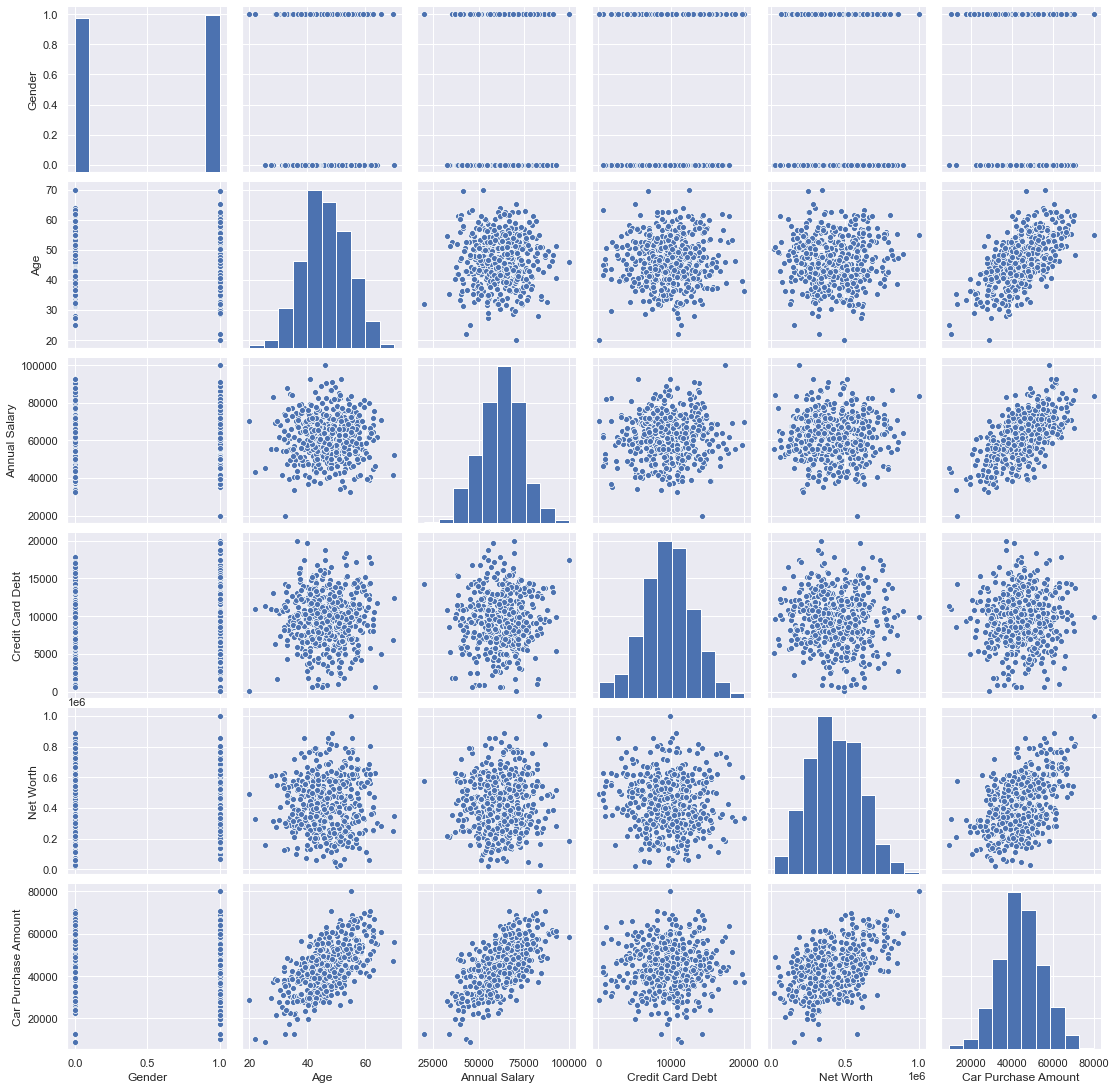

In [4]:
#visualizing using the whole data
sns.pairplot(dataset)

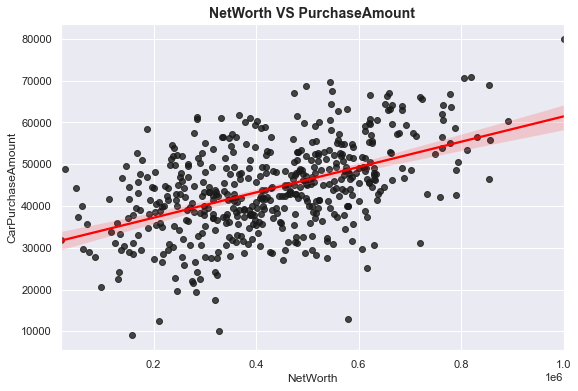

In [5]:
#visualizing using the networth and purchasing amount
sns.set(rc = {'figure.figsize': (9,6)}) 
sns.regplot(x = "Net Worth", 
            y = "Car Purchase Amount", 
            data = dataset, 
            scatter_kws = {'color': 'k'}, 
            line_kws = {'color': 'red'}) 
plt.xlabel("NetWorth")
plt.ylabel("CarPurchaseAmount")
plt.title("NetWorth VS PurchaseAmount", fontsize = 14, weight = "bold")
plt.show()

In [6]:
dataset.iloc[:,3:-1]

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [7]:
#independent variables
x= dataset.iloc[:,3:-1].values
#dependent variable
y=dataset.iloc[:,-1].values
#here the .values is used to store all the values of the dataset in the form of a matrix for further analysis

In [8]:
x

array([[0.00000000e+00, 4.18517198e+01, 6.28120930e+04, 1.16093809e+04,
        2.38961250e+05],
       [0.00000000e+00, 4.08706234e+01, 6.66468929e+04, 9.57295714e+03,
        5.30973908e+05],
       [1.00000000e+00, 4.31528975e+01, 5.37985511e+04, 1.11603551e+04,
        6.38467177e+05],
       ...,
       [1.00000000e+00, 5.39434972e+01, 6.88887780e+04, 1.06116069e+04,
        7.64531320e+05],
       [1.00000000e+00, 5.91605086e+01, 4.98119906e+04, 1.40130345e+04,
        3.37826638e+05],
       [1.00000000e+00, 4.67311525e+01, 6.13706777e+04, 9.39134163e+03,
        4.62946492e+05]])

In [9]:
y

array([35321.45877, 45115.52566, 42925.70921, 67422.36313, 55915.46248,
       56611.99784, 28925.70549, 47434.98265, 48013.6141 , 38189.50601,
       59045.51309, 42288.81046, 28700.0334 , 49258.87571, 49510.03356,
       53017.26723, 41814.72067, 43901.71244, 44633.99241, 54827.52403,
       51130.95379, 43402.31525, 47240.86004, 46635.49432, 45078.40193,
       44387.58412, 37161.55393, 49091.97185, 58350.31809, 43994.35972,
       17584.56963, 44650.36073, 66363.89316, 53489.46214, 39810.34817,
       51612.14311, 38978.67458, 10092.22509, 35928.52404, 54823.19221,
       45805.67186, 41567.47033, 28031.20985, 27815.73813, 68678.4352 ,
       68925.09447, 34215.7615 , 37843.46619, 37883.24231, 48734.35708,
       27187.23914, 63738.39065, 48266.75516, 46381.13111, 31978.9799 ,
       48100.29052, 47380.91224, 41425.00116, 38147.81018, 32737.80177,
       37348.13737, 47483.85316, 49730.53339, 40093.61981, 42297.5062 ,
       52954.93121, 48104.11184, 43680.91327, 52707.96816, 49392

In [10]:
y = y.reshape(-1,1)

In [11]:
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [12]:
####splitting the dataset into Training set and test set#####
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.2, random_state=1)

In [13]:
######feature scaling######
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, :] = sc.fit_transform(x_train[:, :])
x_test[:, :] = sc.transform(x_test[:, :])
y_train[:, :] = sc.fit_transform(y_train[:, :])
y_test[:, :] = sc.transform(y_test[:, :])

In [14]:
 #################################Building the ANN###################################################

In [15]:
#initializing the ANN
ann = tf.keras.models.Sequential()

In [16]:
#adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))

In [17]:
#adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))

In [18]:
#adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

In [19]:
##########################################Training the ANN###########################################################

In [20]:
#compiling the ANN
ann.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [21]:
#training the ANN on the training set
ann.fit(x_train, y_train, batch_size = 32, epochs= 100,verbose=1,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 174ms/step - loss: 0.8209 - val_loss: 0.5697
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5370 - val_loss: 0.3900
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3038 - val_loss: 0.2563
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2521 - val_loss: 0.1611
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1574 - val_loss: 0.1057
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0856 - val_loss: 0.0751
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0794 - val_loss: 0.0558
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0636 - val_loss: 0.0446
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0460 - val_loss: 0.0354
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.0293
Epoch 1

In [22]:
################################Making the predictions and evaluating the model######################################

In [23]:
###predicting the test set results
y_pred = ann.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-2.05131555e+00 -2.07950831e+00]
 [-1.93485975e+00 -1.94577534e+00]
 [-5.42942941e-01 -6.03053285e-01]
 [-7.68687353e-02 -5.59140174e-02]
 [ 8.35905731e-01  8.27949306e-01]
 [ 3.52329254e-01  2.96773152e-01]
 [ 7.80060530e-01  7.11313310e-01]
 [ 3.90763432e-02  3.49515213e-02]
 [ 2.17726856e-01  1.74131104e-01]
 [-4.58443016e-01 -4.98849562e-01]
 [ 1.46034551e+00  1.43851499e+00]
 [-7.72480309e-01 -7.65267863e-01]
 [-9.78718579e-01 -9.14448883e-01]
 [ 3.93630892e-01  3.58668864e-01]
 [-3.83456349e-01 -3.98844731e-01]
 [ 2.73338646e-01  1.97111160e-01]
 [ 1.03493834e+00  1.04443435e+00]
 [ 2.37108326e+00  2.49327508e+00]
 [ 4.39613983e-02  1.32296677e-02]
 [-5.16026139e-01 -5.41105007e-01]
 [ 1.38669685e-01  4.30169418e-02]
 [-3.93993735e-01 -4.10958352e-01]
 [-7.95657635e-01 -8.02429817e-01]
 [ 1.43114662e+00  1.48469094e+00]
 [ 7.45587707e-01  8.13332302e-01]
 [ 1.78893280e+00  1.76233225e+00]
 [-4.26119804e-01 -4.18699003e-01]
 [ 1.20619798e+00  1.38895508e+00]
 [ 1.25776911e+00  1

In [24]:
#inverse scaling
y_pred = sc.inverse_transform(y_pred)
y_test = sc.inverse_transform(y_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[22391.90625    22091.11839   ]
 [23634.37695312 23517.91983   ]
 [38484.78515625 37843.46619   ]
 [43457.34765625 43680.91327   ]
 [53195.765625   53110.88052   ]
 [48036.47265625 47443.74443   ]
 [52599.953125   51866.48719   ]
 [44694.3671875  44650.36073   ]
 [46600.3984375  46135.27233   ]
 [39386.31640625 38955.21919   ]
 [59857.9375     59625.02618   ]
 [36035.84375    36112.79346   ]
 [33835.48046875 34521.17618   ]
 [48477.12109375 48104.11184   ]
 [40186.3515625  40022.17406   ]
 [47193.72265625 46380.44732   ]
 [55319.25390625 55420.56668   ]
 [69574.625      70878.29664   ]
 [44746.48828125 44418.60955   ]
 [38771.9609375  38504.39444   ]
 [45756.93359375 44736.41097   ]
 [40073.9296875  39892.93343   ]
 [35788.5625     35716.31133   ]
 [59546.4140625  60117.67886   ]
 [52232.16015625 52954.93121   ]
 [63363.64453125 63079.84329   ]
 [39731.17578125 39810.34817   ]
 [57146.4296875  59096.26978   ]
 [57696.640625   57430.76903   ]
 [43192.98046875 43264.04965   ]
 [30556.14

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9976922525600563

In [26]:
#Predicting the result of a single observation

test_1=np.array([[1, 50,  50000, 10000, 600000]])


In [27]:
test_1_pred= ann.predict(test_1)

In [28]:
test_1_pred

array([[286711.3]], dtype=float32)

In [29]:
X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])

In [30]:
X_test_sample_pred=ann.predict(X_test_sample)

In [31]:
X_test_sample_pred

array([[0.71919817]], dtype=float32)

In [32]:
 X_test_sample_pred_inverse =sc.inverse_transform(X_test_sample_pred)

In [33]:
X_test_sample_pred_inverse

array([[51950.61]], dtype=float32)

In [34]:
###############################################################